In [1]:
import numpy as np
import matplotlib.pyplot as plt
from glider import Glider
from stable_baselines3 import PPO
from stable_baselines3.common.callbacks import CheckpointCallback

# from stable_baselines3.common.env_checker import check_env

In [ ]:
glider = Glider(u0=0.25, v0=0.25, w0=0.1)

checkpoint_callback = CheckpointCallback(
    save_freq=50_000,
    save_path="./big_state_models/",
    name_prefix="rl_model",
)

In [ ]:
model = PPO("MlpPolicy", glider, verbose=1, tensorboard_log="big_state_logs/")
model.learn(total_timesteps=6e5, callback=checkpoint_callback)

In [2]:
glider = Glider(u0=0.25, v0=0.25, w0=0.1)
model = PPO.load("big_state_models/rl_model_600000_steps.zip", env=glider)
done = False
obs = glider.reset()
while not done:
    action, _states = model.predict(obs, deterministic=True)
    obs, reward, done, _ = glider.step(action.item())

/Users/iandavenport/Desktop/research/projects/gliding/venv/lib/python3.7/site-packages/gym/spaces/box.py:74: UserWarning: WARN: Box bound precision lowered by casting to float32
  "Box bound precision lowered by casting to {}".format(self.dtype)


Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


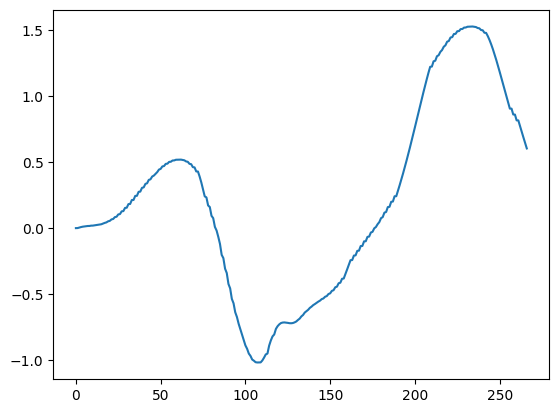

In [3]:
plt.plot(glider.theta)

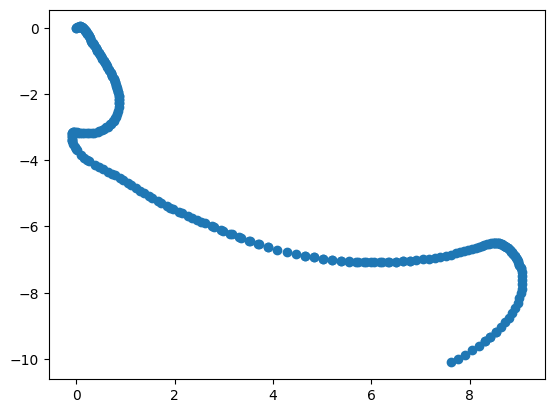

In [4]:
plt.scatter(glider.x, glider.y)

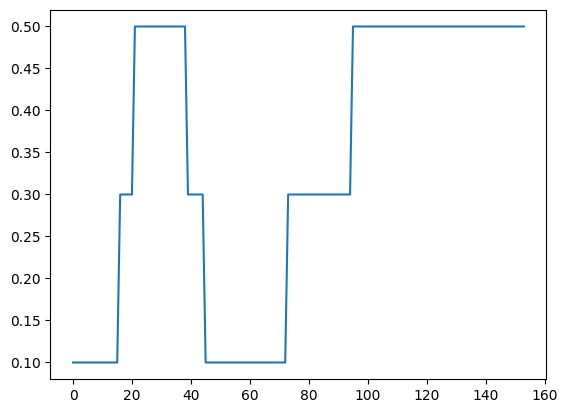

In [5]:
plt.plot(glider.beta)

In [ ]:
plt.plot(glider.)

In [ ]:
# model = PPO("MlpPolicy", env=glider, verbose=1)
# obs = glider.reset()
# done = False
# while not done:
#     action, _states = model.predict(obs)
#     obs, rewards, done, info = glider.step(action.item())

In [ ]:
# print(f"The x history is {glider.x}. The y history is {glider.y}. The theta history is {glider.theta}")
# print(f"The u history is {glider.u}. The v history is {glider.v}. The w history is {glider.w}")

In [ ]:
t_hist = np.concatenate(glider.t_hist[:])

In [ ]:
plt.scatter(glider.x, glider.y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Position of the cylinder over time")
plt.show()

In [ ]:
plt.plot(t_hist, glider.u)
plt.xlabel("time")
plt.ylabel("u")
plt.title("Horizontal speed over time")
plt.show()

In [ ]:
plt.plot(t_hist, glider.v)
plt.xlabel("time")
plt.ylabel("v")
plt.title("Vertical speed over time")
plt.show()

In [ ]:
plt.plot(glider.beta)
plt.xlabel("Time")
plt.ylabel(r"$\beta$", rotation=0)
plt.title("Aspect ratio over time")
plt.show()

In [ ]:
speeds = [glider.speed(u, v) for u, v in zip(glider.u, glider.v)]

In [ ]:
plt.plot(speeds)